### Importing Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Training Data and Cleaning it

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data = train_data.drop(['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' , 'Cabin' , 'Embarked'],axis=1)
train_data.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [5]:
train_data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [6]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [7]:
gender = pd.get_dummies(train_data['Sex'])
train_data = pd.concat([train_data,gender],axis=1)

In [8]:
train_data.head()

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,22.0,7.2500,0,1
1,1,1,female,38.0,71.2833,1,0
2,1,3,female,26.0,7.9250,1,0
3,1,1,female,35.0,53.1000,1,0
4,0,3,male,35.0,8.0500,0,1


In [9]:
train_data = train_data.drop(['Sex','female'],axis=1)
train_data.head()

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1


In [10]:
mean_age = round(train_data.Age.mean())
train_data.Age.fillna(mean_age,inplace=True)

In [11]:
train_data

,Survived,Pclass,Age,Fare,male
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,0
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,0,3,35.0,8.0500,1
...,...,...,...,...,...
886,0,2,27.0,13.0000,1
887,1,1,19.0,30.0000,0
888,0,3,30.0,23.4500,0
889,1,1,26.0,30.0000,1


In [12]:
train_data.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
male        0
dtype: int64

### Using Machine Learning to Predict the test data (Also using same methods for cleaning of test data )

In [13]:
X = train_data.drop('Survived',axis=1).values
y = train_data['Survived'].values

In [15]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters,cv=5)
clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

In [16]:
clf.best_score_

0.7822861088443915

In [17]:
clf.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [18]:

model = SVC(kernel='rbf', C=1000, gamma=0.001)
model.fit(X,y)

SVC(C=1000, gamma=0.001)

In [19]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
passenger = test_data['PassengerId'].values

In [21]:
test_data = test_data.drop(['PassengerId' , 'Name' , 'SibSp' , 'Parch' , 'Ticket' , 'Cabin' , 'Embarked'],axis=1)
test_data.head()

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875


In [22]:
test_data.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [23]:
test_data['Age'].fillna(test_data.Age.mean(),inplace=True)
test_data['Fare'].fillna(test_data.Fare.mean(),inplace=True)


In [24]:
test_data.isnull().sum()


Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [25]:
gender = pd.get_dummies(test_data['Sex'])
test_data = pd.concat([test_data,gender],axis=1)
test_data = test_data.drop(['Sex','female'],axis=1)
test_data.head()

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0


In [26]:
predictions = model.predict(test_data)

### Creating an external csv file for storing predictions

In [27]:
submission = pd.DataFrame({'PassengerId': passenger , 'Survived' : predictions})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [28]:
submission.to_csv('submission.csv',index=False)

### Visualizing the Training Data

In [29]:
plt.style.use('bmh') 

In [30]:
not_survived = train_data[train_data['Survived'] == 0 ]

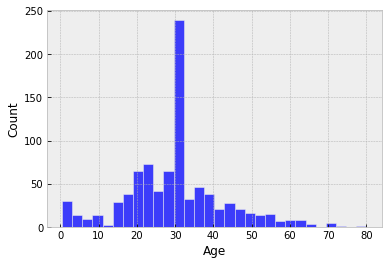

In [31]:
sns.histplot(train_data['Age'])
plt.show()


##Using this plot we can say people whose age were 30s were the most number of people who didnt survived

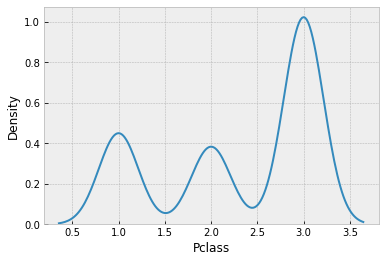

In [32]:
sns.kdeplot(train_data['Pclass'])
plt.show()

## Here we can see most number of people were in Pclass 3

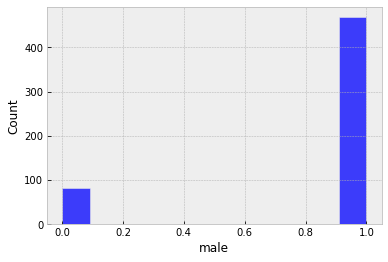

In [33]:
sns.histplot(not_survived['male'])
plt.show()

##Males died more than females